Data import

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

In [3]:
df_raw = pd.read_csv("student-mat.csv",  sep=';')
df = df_raw.copy()
print(df.shape)
df

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Search duplicate values

In [5]:
df[df.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


Check the correctness of the data

In [6]:
df["school"].unique()
unique_values = {col: df[col].unique() for col in df.columns}
unique_values

{'school': array(['GP', 'MS'], dtype=object),
 'sex': array(['F', 'M'], dtype=object),
 'age': array([18, 17, 15, 16, 19, 22, 20, 21]),
 'address': array(['U', 'R'], dtype=object),
 'famsize': array(['GT3', 'LE3'], dtype=object),
 'Pstatus': array(['A', 'T'], dtype=object),
 'Medu': array([4, 1, 3, 2, 0]),
 'Fedu': array([4, 1, 2, 3, 0]),
 'Mjob': array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
 'Fjob': array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object),
 'reason': array(['course', 'other', 'home', 'reputation'], dtype=object),
 'guardian': array(['mother', 'father', 'other'], dtype=object),
 'traveltime': array([2, 1, 3, 4]),
 'studytime': array([2, 3, 1, 4]),
 'failures': array([0, 3, 2, 1]),
 'schoolsup': array(['yes', 'no'], dtype=object),
 'famsup': array(['no', 'yes'], dtype=object),
 'paid': array(['no', 'yes'], dtype=object),
 'activities': array(['no', 'yes'], dtype=object),
 'nursery': array(['yes', 'no'], dtype=object),
 'h

In [7]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [8]:
from mean_func import mean_most_likely_interval

mean_most_likely_interval(df['absences'])

np.float64(3.75)

absence: 5.708860759493671


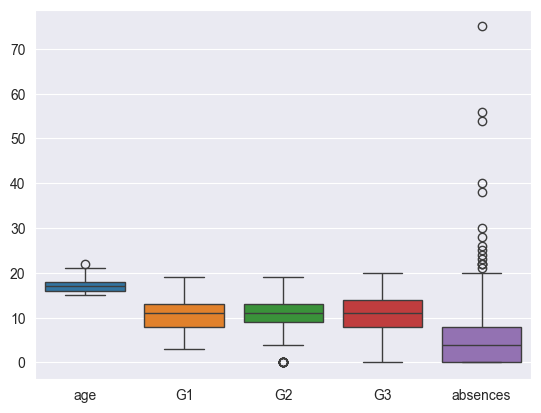

In [9]:
sns.boxplot(df[['age', 'G1', 'G2', 'G3', 'absences']])
mean_value = df['absences'].mean()
print(f"absence: {mean_value}")


<Axes: xlabel='absences', ylabel='Count'>

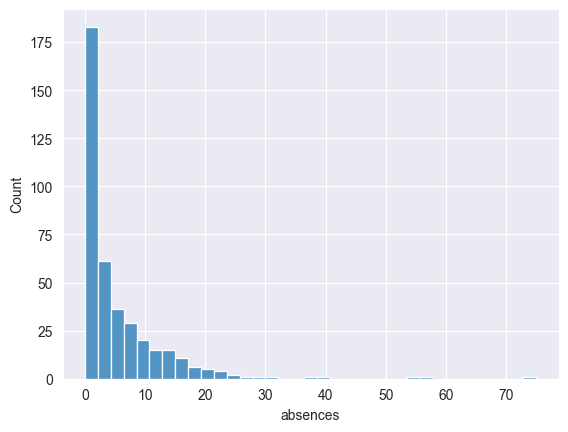

In [10]:
sns.histplot(df['absences'])

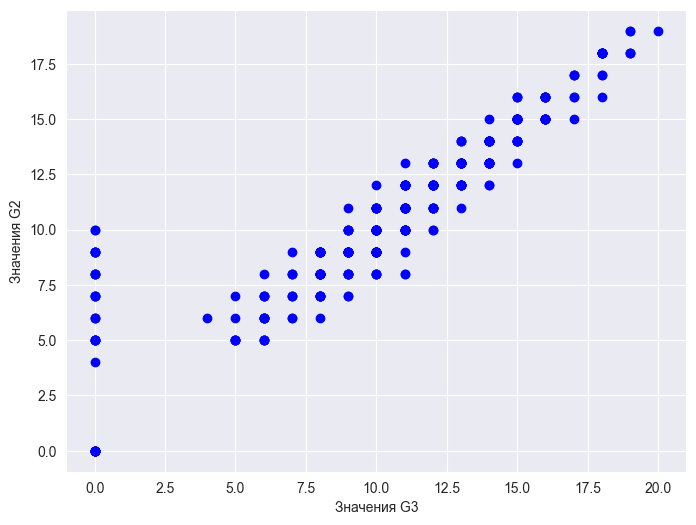

In [24]:
df_new = df.copy()

plt.figure(figsize=(8, 6))  # Размер графика
plt.scatter(df_new['G3'], df_new['G2'], color='blue', label='G2')
plt.xlabel('Значения G3')
plt.ylabel('Значения G2')
plt.grid(True)

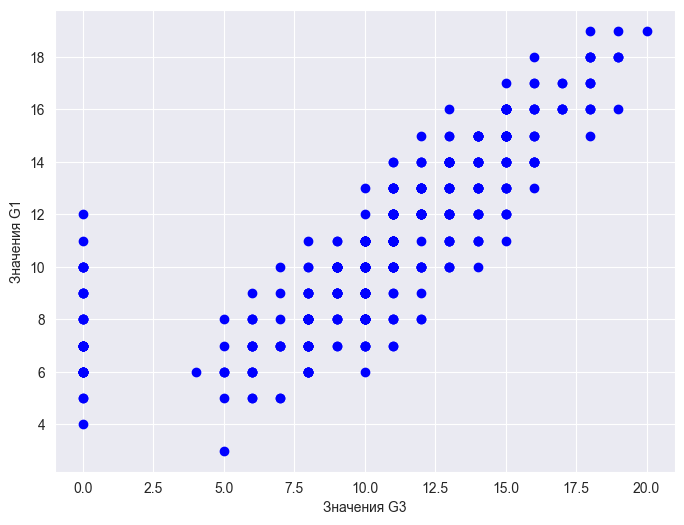

In [30]:
plt.figure(figsize=(8, 6))  # Размер графика
plt.scatter(df_new['G3'], df_new['G1'], color='blue', label='G1')
plt.xlabel('Значения G3')
plt.ylabel('Значения G1')
plt.grid(True)

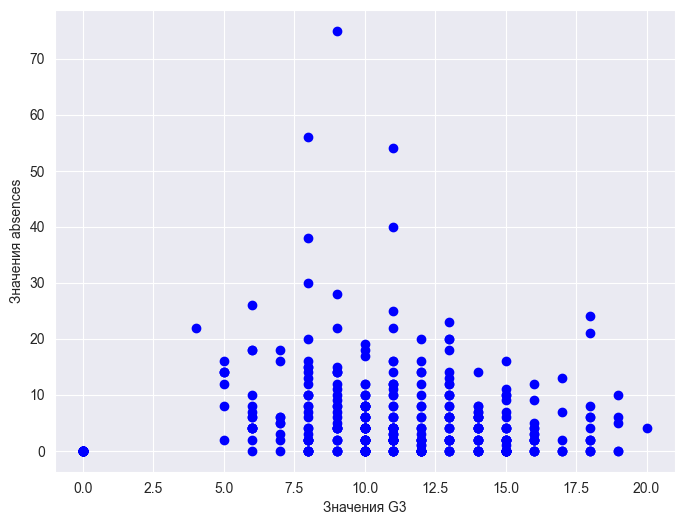

In [31]:
plt.figure(figsize=(8, 6))  # Размер графика
plt.scatter(df_new['G3'], df_new['absences'], color='blue', label='absences')
plt.xlabel('Значения G3')
plt.ylabel('Значения absences')
plt.grid(True)

In [21]:
import numpy as np

absences = df_new['absences'] > 30
df_new.loc[absences, 'absences'] = mean_most_likely_interval(df['absences']).astype(np.int64)
'''
zero_g2 = df_new['G2']== 0
df_new.loc[zero_g2, 'G2'] = df_new['G2'].median()

age_outlier = df_new['age'] > 21
df_new.loc[age_outlier,'age'] = df_new['age'].median()
sns.boxplot(df_new[['absences', 'G2', 'age']])
'''
values = df_new['G3'] == 0
df_new.loc[values, 'G1'] = 4

Transformation categorical data to numeric

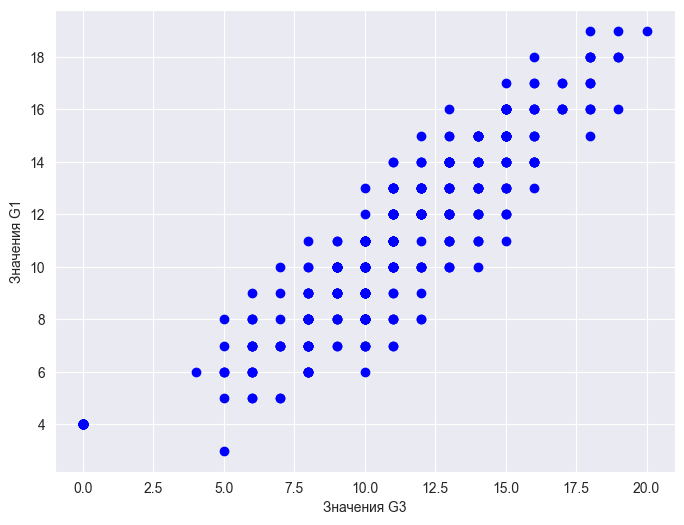

In [23]:
plt.figure(figsize=(8, 6))  # Размер графика
plt.scatter(df_new['G3'], df_new['G1'], color='blue', label='G1')
plt.xlabel('Значения G3')
plt.ylabel('Значения G1')
plt.grid(True)

In [22]:
from sklearn.preprocessing import LabelEncoder

'''
binary_columns = [col for col in df_new.columns if df_new[col].nunique() <= 5]
df_filtered = df_new.copy().drop(columns=binary_columns)
'''
categorical_cols = df.select_dtypes(include=['object']).columns


df_filtered = df.copy()
label_encoder = LabelEncoder()

for col in categorical_cols:
    df_filtered[col] = label_encoder.fit_transform(df_filtered[col])

df_filtered

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


In [14]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_filtered)
scaled_df = pd.DataFrame(scaled_data, columns=df_filtered.columns)

<Axes: >

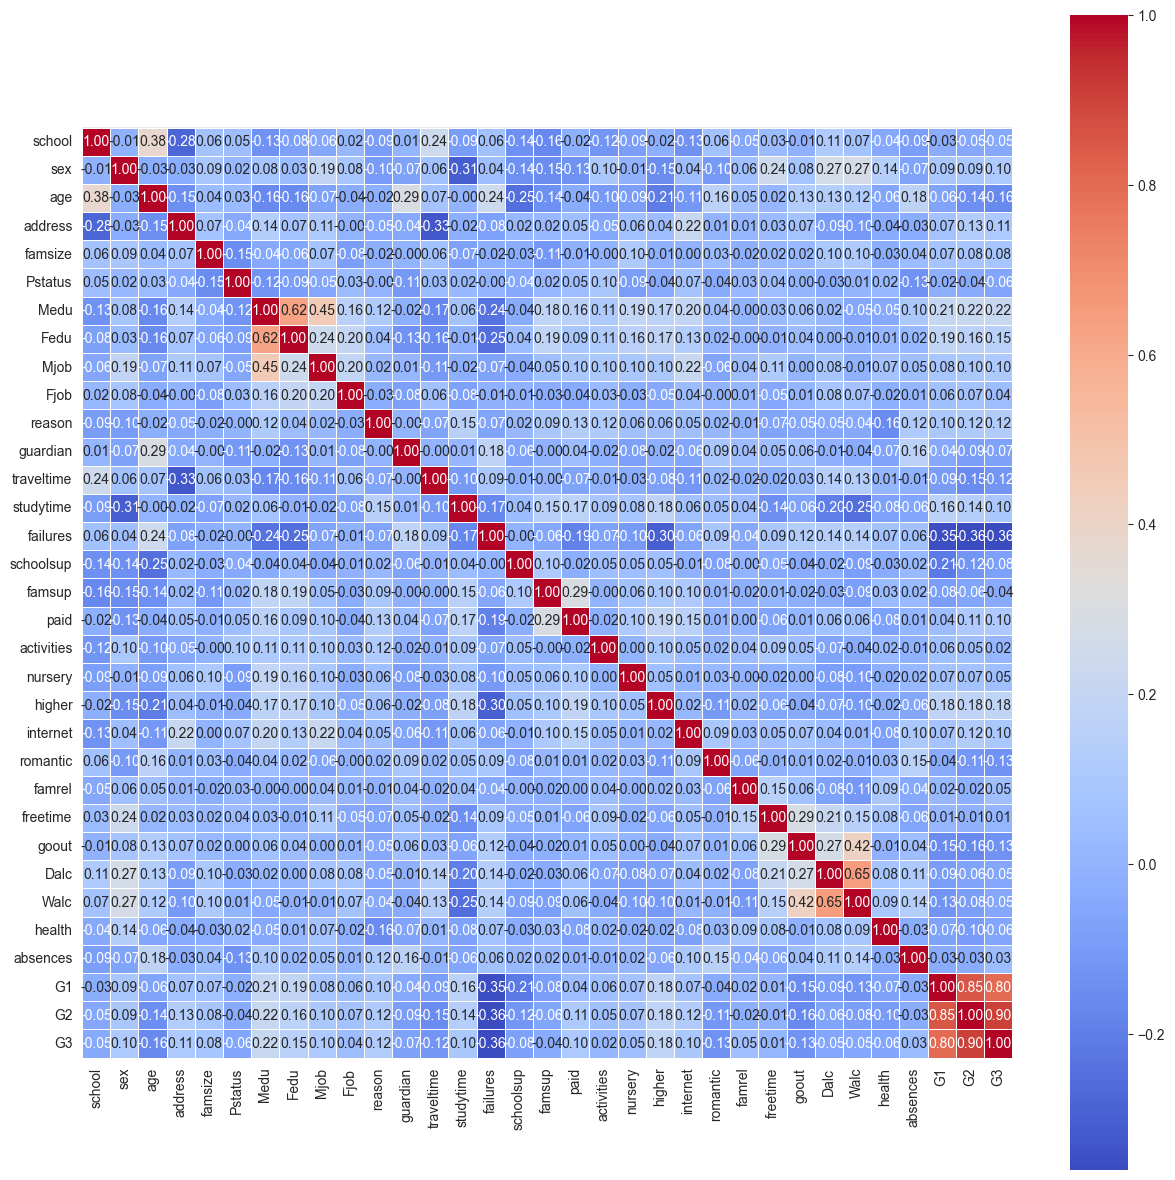

In [15]:
figsize = (15,15)
new_fig, new_ax = plt.subplots(figsize=figsize)
corr_matrix_new = scaled_df.corr()
sns.heatmap(corr_matrix_new, ax=new_ax, annot=True, square=True,  cmap='coolwarm', fmt='.2f', linewidth=0.5)

In [16]:
X = df_filtered.drop('G3', axis=1)  # Признаки
Y = df_filtered['G3']
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = clf.fit(X, Y)
feature_importances = clf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})


importance_df.sort_values(by='Importance', ascending=False)


,Feature,Importance
31,G2,0.777236
29,absences,0.080661
30,G1,0.032546
28,health,0.021745
14,failures,0.015423
7,Fedu,0.012872
24,freetime,0.011589
27,Walc,0.011032
9,Fjob,0.010773
10,reason,0.009572


In [23]:
df_without_g1 = df_filtered.drop('G1', axis=1)

X = df_without_g1.drop('G3', axis=1)  # Признаки
Y = df_without_g1['G3']
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = clf.fit(X, Y)
feature_importances = clf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})


importance_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
30,G2,0.776130
29,absences,0.080110
28,health,0.026094
9,Fjob,0.016893
25,goout,0.015958
14,failures,0.015318
7,Fedu,0.012784
24,freetime,0.011509
27,Walc,0.010957
23,famrel,0.010312
